First 5 Rows:
    target               a         b   c                  d          e  \
0     0.0  lv hypertrophy  0.531368  63       fixed defect  Cleveland   
1     1.0  lv hypertrophy -1.056253  67             normal  Cleveland   
2     1.0  lv hypertrophy  0.438407  67  reversable defect  Cleveland   
3     0.0          normal -1.413430  37             normal  Cleveland   
4     0.0  lv hypertrophy -1.347216  41             normal  Cleveland   

          f                g      h      i  ...          r       s    t  \
0  0.285812   typical angina  233.0   True  ...  60.627689    Male  2.3   
1  1.660947     asymptomatic  286.0  False  ...  65.225088    Male  1.5   
2 -0.305235     asymptomatic  229.0  False  ...  66.956699    Male  2.6   
3  0.887054      non-anginal  250.0  False  ...  37.160246    Male  3.5   
4 -0.558037  atypical angina  204.0  False  ...  41.359067  Female  1.4   

           u      v         w    x          y   z      {  
0  62.306825  145.0 -1.007833  0.0  

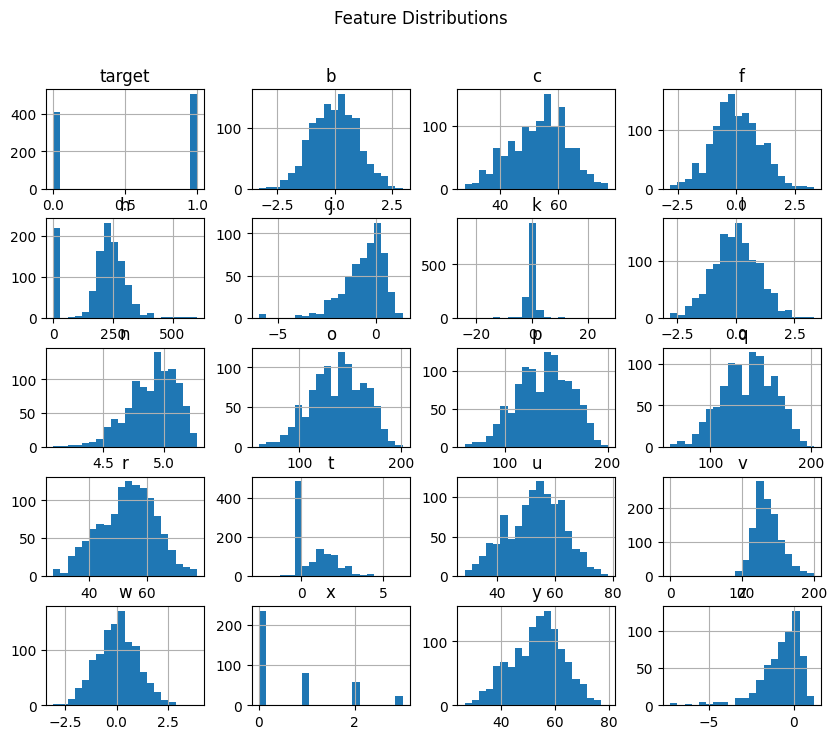


Number of Duplicated Rows: 0


c:\Users\HP\OneDrive\Documents\GitHub\BINF5507_ML-AI_in_Bioinfo\Assignment1\Scripts\data_preprocessor.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
c:\Users\HP\OneDrive\Documents\GitHub\BINF5507_ML-AI_in_Bioinfo\Assignment1\Scripts\data_preprocessor.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because th

Accuracy: 0.842391304347826
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.78      0.82        82
         1.0       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184


Cleaned dataset saved to '../Data/clean_data.csv'.


In [ ]:
# Import necessary modules
import data_preprocessor as dp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load the dataset
messy_data = pd.read_csv('../Data/messy_data.csv')

# 2. Examine the Dataset
print("First 5 Rows:\n", messy_data.head())   
print("\nDataset Info:\n")  
messy_data.info()  
print("\nSummary Statistics:\n", messy_data.describe())  

# Check for missing values
print("\nMissing Values Count:\n", messy_data.isnull().sum())

# Visualize numerical distributions (optional)
messy_data.hist(figsize=(10, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

# 3. Identify Issues
print(f"\nNumber of Duplicated Rows: {messy_data.duplicated().sum()}")

# 4. Apply Preprocessing Step-by-Step
clean_data = messy_data.copy()

clean_data = dp.impute_missing_values(clean_data, strategy='mean')
clean_data = dp.remove_duplicates(clean_data)
clean_data = dp.normalize_data(clean_data, method='minmax')
clean_data = dp.remove_redundant_features(clean_data, threshold=0.9)

# 5. Train and Evaluate the Model **Before Saving**
from data_preprocessor import simple_model  # Import function explicitly

simple_model(clean_data, print_report=True)  # Train & evaluate model

# 6. Save the Cleaned Dataset **After Modeling**
clean_data.to_csv('../Data/clean_data.csv', index=False)
print("\nCleaned dataset saved to '../Data/clean_data.csv'.")
